### CS 180 Project 
Linear Regression on Philippine Food Prices Dataset to predict future commodity prices

In [212]:
import pandas as pd
data = pd.read_csv('wfp_food_prices_phl.csv')
data.head()
data.dropna()
print(data.shape)
print(data.columns)

(121513, 14)
Index(['date', 'admin1', 'admin2', 'market', 'latitude', 'longitude',
       'category', 'commodity', 'unit', 'priceflag', 'pricetype', 'currency',
       'price', 'usdprice'],
      dtype='object')


C:\Users\WINDOWS 10\AppData\Local\Temp\ipykernel_21768\2342338528.py:2: DtypeWarning: Columns (4,5,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('wfp_food_prices_phl.csv')


C:\Users\WINDOWS 10\AppData\Local\Temp\ipykernel_21768\1891688974.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pork['price'] = pd.to_numeric(pork['price'], errors='coerce')
C:\Users\WINDOWS 10\AppData\Local\Temp\ipykernel_21768\1891688974.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pork['date'] = pd.to_datetime(pork['date'].astype(str))


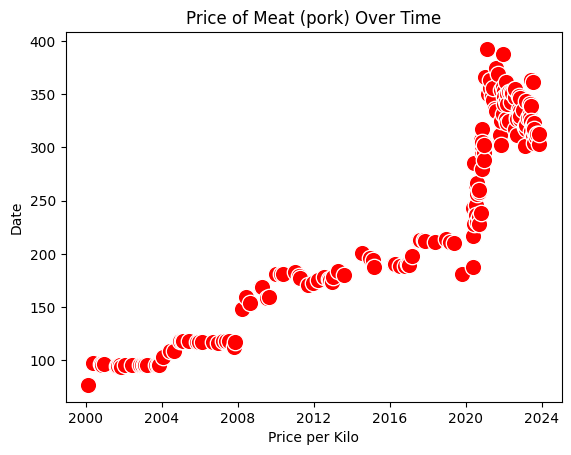

In [213]:
### Proof that Meat (Pork) is Linear
import seaborn as sns
import matplotlib.pyplot as plt
# sns.histplot(pork['Life expectancy '].dropna(), kde=True, color='green')
import pandas as pd
# Filter rows where 'category' is 'fruits and vegetables'
pork = data[(data['commodity'] == 'Meat (pork)') & (data['admin1'] == 'Region III')]
pork['price'] = pd.to_numeric(pork['price'], errors='coerce')
# Convert 'date' column to string, then to datetime
pork['date'] = pd.to_datetime(pork['date'].astype(str))


sns.scatterplot(x=pork['date'], y = pork['price'], s=140, c='red')
plt.xlabel('Price per Kilo')
plt.ylabel('Date')
plt.title('Price of Meat (pork) Over Time')
plt.show()

### Data preprocessing (Not Yet Finished)

In [214]:
from sklearn.preprocessing import LabelEncoder

# Remove unnecessary columns:
# admin2 = province ; market = city ; currency = all PHP

# Question: Ano difference ng actual at aggregate price? Need ba tanggalin yung priceflag column?
data.drop(['admin2', 'market', 'latitude', 'longitude', 'currency', 'usdprice'], axis=1, inplace=True)

# Remove first garbage row
data = data[1:]

# Encode region
le = LabelEncoder()
data['region'] = le.fit_transform(data['admin1'])

# # Rename admin1 to region
# data.rename(columns={'admin1': 'region'}, inplace=True)

# Separate date into own columns (year, month, day)
data['date'] = pd.to_datetime(data['date'])

data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day

data = data.drop('date', axis=1)

print(data.shape)
print(data.columns)

# There are 74 unique commodities and 17 regions (not all regions have all commodities)

# May wholesale at retail price for almost each commodity.
# Kunin nalang ba natin average nun?
# Per region ba/ per commodity kukunin yun?

# Sa commodites naman, may mga subcategories pa (ex. rice: white, regular, well milled, etc.)
# pagsamahin nalang ba natin sa isa? like rice lang tas average price?


(121512, 11)
Index(['admin1', 'category', 'commodity', 'unit', 'priceflag', 'pricetype',
       'price', 'region', 'year', 'month', 'day'],
      dtype='object')


### Perform regression on the dataset.

In [215]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Sample on 'Rice (regular, milled)' in 'Region III'
pork_sample = data[(data['commodity'] == 'Meat (pork)') & (data['admin1'] == 'Region III')]
pork_sample
# Drop uncessary columns
pork_sample.drop(['commodity', 'category', 'admin1', 'pricetype', 'unit', 'priceflag'], axis=1, inplace=True)

# Split
X = pork_sample.drop(['price'], axis=1).values
y = pork_sample['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# Train
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predict
y_pred = regressor.predict(X_test)

# Compare actual and predicted
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = regressor.predict(X_test)
comparison_df = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})

mse = mean_squared_error(y_test, y_pred)

display(comparison_df)
print('MAE:', mean_absolute_error(y_test,y_pred))
print('MSE:', mse)
print("RMSE:",np.sqrt(mse))
print("r2:", r2_score(y_test,y_pred))


C:\Users\WINDOWS 10\AppData\Local\Temp\ipykernel_21768\3811535451.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pork_sample.drop(['commodity', 'category', 'admin1', 'pricetype', 'unit', 'priceflag'], axis=1, inplace=True)


,Actual,Predicted
0,311.71,299.547380
1,374.39,299.949589
2,301.69,287.819708
3,338.74,323.404932
4,117.0,137.974334
5,175.76,195.607170
6,197.83,254.848843
7,103.23,105.405678
8,356.25,300.351798
9,361.25,312.682783


MAE: 26.278278932726796
MSE: 1143.9760578690223
RMSE: 33.82271511675286
r2: 0.8761754872594434


### Proof that most commodity data is linear

### Show results.